In [3]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('MergeConflictsDataset.csv')

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

# to make this notebook's output stable across runs
np.random.seed(42)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from wordcloud import WordCloud

import seaborn as sns

In [4]:
def load_data():
    df = pd.read_csv("MergeConflictsDataset.csv", sep = ";")
    return df

In [5]:
dataset = load_data()

In [6]:
dataset.head(100)

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,copied files,modified files,nr commits1,nr commits2,density1,density2,fix,bug,feature,improve,document,refactor,update,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,0,0,0,0,0,4,0,5,0,0,0,0,0,0,0,0,3,0,0,0,0,0,20,65,35.400000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,3,7,199,2,0,177,2,47,2,13,1,0,0,0,0,0,1,0,0,0,0,0,31,117,58.563830,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18,18.000000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,1,0,0,0,0,1,5,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,22,63,38.800000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,1,0,0,0,0,1,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,31,56,43.500000,43.5,1
5,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,fe463db016c4b34d66c742165fc89d702be575b9,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,1,1,24,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,31,31,31.000000,31.0,0
6,f8ca5065f2fc5cfc91519de3b20446d91ec0d39c,7e61fc136050be2e5057f615541c0efba38deb07,5ee46715edf40e115fbfbdafd4bc8a8b51c11bb1,f5ad47b47074b437e5b50d10c277679fcd765ab9,0,0,0,1,1,286,1,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,22,22.000000,22.0,0
7,72fd7d81c9c7e28af8740f5a1b210a803290383d,5b8e52ff69f338c9749ab871e1569e3292310f15,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,d9b2ac5d01163ca45b84ead150a6119e26ee0593,0,0,0,1,1,126,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,54,54,54.000000,54.0,0
8,f80486b832b493832b1f2df38614928911d41b1d,65db38d6222bb2961916c11360db32ab3ace3576,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,65db38d6222bb2961916c11360db32ab3ace3576,1,0,0,0,2,14,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,34,36,35.000000,35.0,0
9,af577a42e0e5686dc9393fc9f97d95703e966de1,0d92bec79ad16347c7fa844e40c2fb8420f4efb5,b6c7625c6fb39656d49558672355841eea9d5b65,1392056d73b28a15a17e2937df4129d09fc24e07,1,1,1,7,1,3814,0,0,0,0,0,1,46,1,1,0,5,0,0,0,0,0,9,2,0,0,0,1,24,84,38.456522,30.0,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26973 entries, 0 to 26972
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   commit           26973 non-null  object 
 1   parent1          26973 non-null  object 
 2   parent2          26973 non-null  object 
 3   ancestor         26972 non-null  object 
 4   is pr            26973 non-null  int64  
 5   added lines      26973 non-null  int64  
 6   deleted lines    26973 non-null  int64  
 7   devs parent1     26973 non-null  int64  
 8   devs parent2     26973 non-null  int64  
 9   time             26973 non-null  int64  
 10  nr files         26973 non-null  int64  
 11  added files      26973 non-null  int64  
 12  deleted files    26973 non-null  int64  
 13  renamed files    26973 non-null  int64  
 14  copied files     26973 non-null  int64  
 15  modified files   26973 non-null  int64  
 16  nr commits1      26973 non-null  int64  
 17  nr commits2 

In [8]:
dataset.dropna(subset = ["ancestor"])

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,copied files,modified files,nr commits1,nr commits2,density1,density2,fix,bug,feature,improve,document,refactor,update,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,0,0,0,0,0,4,0,5,0,0,0,0,0,0,0,0,3,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,3,7,199,2,0,177,2,47,2,13,1,0,0,0,0,0,1,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,1,0,0,0,0,1,5,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,1,0,0,0,0,1,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,31,56,43.50000,43.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26968,c52216c411e4d7d9ef7845926f471f49f48b3ea5,5d50b1ca2496766e6d3f3673e1f6abff20f9ffaf,d7727481e759ef6ac2c285d64c4ebb86666652f9,5d50b1ca2496766e6d3f3673e1f6abff20f9ffaf,1,66,0,0,1,184,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,19,19.00000,19.0,0
26969,8bf4fb99b439379ed99f0a4fc761fa65ca31d8ba,a248acc589a43d7234d383252546b99b27ec32b9,478863dfe34904b9490be64c0d508e0af6b46b2f,ebffde52d50a6c8f9973ec675b8ab17dea5420e1,1,1,1,2,1,762,1,0,0,0,0,1,5,1,0,0,1,0,0,0,0,0,4,0,0,0,0,0,30,34,33.20000,34.0,0
26970,a27a50f87f61d871ddb1aeed6993b132fd657ea6,542ff7fe4297d73a39664b468962ab681e4bea91,ddddae9b5f9537cb06d2c4872184fa25d9f3ca77,542ff7fe4297d73a39664b468962ab681e4bea91,1,1,1,0,1,22,0,0,0,0,0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,58,33.00000,33.0,0
26971,ddddae9b5f9537cb06d2c4872184fa25d9f3ca77,542ff7fe4297d73a39664b468962ab681e4bea91,e6ed8366b6e1e72bc8de97159198c64edab5cd96,542ff7fe4297d73a39664b468962ab681e4bea91,1,1,1,0,1,11,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,8,8.00000,8.0,0


In [9]:
numeric_dataset = dataset.select_dtypes(include='number')  # Select only numeric columns
corrMat = numeric_dataset.corr()

In [10]:
# Check if "conflict" column exists in corrMat DataFrame
if "conflict" in corrMat.columns:
    # Sort correlation values for the "conflict" column
    sorted_corr = corrMat["conflict"].sort_values(ascending=False)
    print(sorted_corr)
else:
    print("Column 'conflict' does not exist in the correlation matrix.")

conflict           1.000000
nr commits2        0.303397
devs parent2       0.274583
add                0.235729
density2           0.219509
remove             0.202772
nr files           0.172194
fix                0.164832
update             0.158182
messages_max       0.153547
refactor           0.144355
time               0.136070
change             0.130545
use                0.128977
nr commits1        0.120827
feature            0.118534
bug                0.107971
document           0.097043
modified files     0.090034
devs parent1       0.073838
improve            0.066413
delete             0.060816
added lines        0.040154
deleted lines      0.036818
messages_mean      0.034018
renamed files      0.031805
deleted files      0.023776
density1           0.022992
added files        0.019285
messages_median    0.018941
messages_min      -0.082620
is pr             -0.436992
copied files            NaN
Name: conflict, dtype: float64


In [11]:
def convert_ids_to_integers(dataset):

    # Extract unique IDs from relevant columns
    all_ids = set(dataset["commit"]) | set(dataset["parent1"]) | set(dataset["parent2"]) | set(dataset["ancestor"])

    # Create a mapping dictionary for each unique ID to an integer
    id_to_integer = {}
    next_integer_id = 1
    for id_ in all_ids:
        if id_ not in id_to_integer:
            id_to_integer[id_] = next_integer_id
            next_integer_id += 1

    # Map each ID in the dataset to its corresponding integer
    dataset['commit'] = dataset['commit'].map(id_to_integer)
    dataset['parent1'] = dataset['parent1'].map(id_to_integer)
    dataset['parent2'] = dataset['parent2'].map(id_to_integer)
    dataset['ancestor'] = dataset['ancestor'].map(id_to_integer)

    return dataset

In [12]:
dataset = convert_ids_to_integers(dataset)

In [13]:
dataset.head(10)

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,copied files,modified files,nr commits1,nr commits2,density1,density2,fix,bug,feature,improve,document,refactor,update,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,28346,54041,39032,54041,1,5,0,0,1,23,0,0,0,0,0,4,0,5,0,0,0,0,0,0,0,0,3,0,0,0,0,0,20,65,35.400000,20.0,0
1,60021,49867,54041,34996,0,1166,11267,1,2,371,3,7,199,2,0,177,2,47,2,13,1,0,0,0,0,0,1,0,0,0,0,0,31,117,58.563830,53.5,1
2,55734,19641,42559,19641,1,0,0,0,1,22,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,18,18.000000,18.0,0
3,22380,63052,55571,52149,1,0,0,2,1,24,1,0,0,0,0,1,5,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,22,63,38.800000,31.0,0
4,63052,1816,2412,51164,0,0,0,1,2,2,1,0,0,0,0,1,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,31,56,43.500000,43.5,1
5,2412,51164,55047,52149,1,0,0,1,1,24,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,31,31,31.000000,31.0,0
6,45036,39671,21984,64317,0,0,0,1,1,286,1,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,22,22.000000,22.0,0
7,49867,10831,34996,23913,0,0,0,1,1,126,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,54,54,54.000000,54.0,0
8,61123,5398,34996,5398,1,0,0,0,2,14,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,34,36,35.000000,35.0,0
9,29336,41388,19349,56167,1,1,1,7,1,3814,0,0,0,0,0,1,46,1,1,0,5,0,0,0,0,0,9,2,0,0,0,1,24,84,38.456522,30.0,0


In [14]:
dataset.loc[:,"renamed_files_cat"] = pd.cut(
    dataset["renamed files"],
    bins=[0, 1, 2, 3, 4, np.inf],
    labels=["0-1", "1-2", "2-3", "3-4", ">4"])

In [15]:
dataset["renamed_files_cat"].value_counts()

renamed_files_cat
0-1    440
>4     358
1-2    112
2-3     72
3-4     54
Name: count, dtype: int64

In [16]:
renamed_files_prop_dataset = dataset["renamed_files_cat"].value_counts() / len(dataset)
print(renamed_files_prop_dataset)

renamed_files_cat
0-1    0.016313
>4     0.013273
1-2    0.004152
2-3    0.002669
3-4    0.002002
Name: count, dtype: float64


In [17]:
dataset.loc[:,"copied_files_cat"] = pd.cut(
    dataset["copied files"],
    bins=[0, 1, 2, 3, 4, np.inf],
    labels=["0-1", "1-2", "2-3", "3-4", ">4"])

In [18]:
dataset["copied_files_cat"].value_counts()

copied_files_cat
0-1    0
1-2    0
2-3    0
3-4    0
>4     0
Name: count, dtype: int64

In [19]:
def get_relevant_columns(dataset, target_column, corr_threshold, corrMat, additional_columns=[]):
    # Filter the correlation matrx to include only relevant columns
    relevant_columns = corrMat[target_column][abs(corrMat[target_column]) > corr_threshold].index.tolist()
    # Add some extra relevant columns, not "detected" by the correlation matrix
    relevant_columns.extend(additional_columns)

    return relevant_columns

In [20]:
target_column = "conflict"
corr_threshold = 0.09
additional_columns = ["copied files","renamed files"]

relevant_columns = get_relevant_columns(dataset, target_column, corr_threshold, corrMat, additional_columns)
print(relevant_columns)

relevant_data = dataset[relevant_columns]

['is pr', 'devs parent2', 'time', 'nr files', 'modified files', 'nr commits1', 'nr commits2', 'density2', 'fix', 'bug', 'feature', 'document', 'refactor', 'update', 'add', 'remove', 'use', 'change', 'messages_max', 'conflict', 'copied files', 'renamed files']


In [21]:
relevant_data.describe()

,is pr,devs parent2,time,nr files,modified files,nr commits1,nr commits2,density2,fix,bug,feature,document,refactor,update,add,remove,use,change,messages_max,conflict,copied files,renamed files
count,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.0,26973.000000
mean,0.777741,1.911801,240.714159,0.752048,8.169614,19.264301,5.419679,1.279205,4.347644,0.470322,0.161606,0.450376,0.178178,2.135469,4.316205,0.955437,1.338857,1.007860,104.662551,0.054425,0.0,0.970229
std,0.415772,6.534316,908.382038,10.620490,74.931372,56.461614,25.426160,5.721774,12.434022,1.983746,0.880704,1.825317,0.783933,6.751948,12.924317,3.203307,4.269666,6.033535,89.471017,0.226858,0.0,64.245155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.000000,1.000000,9.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000,0.0,0.000000
50%,1.000000,1.000000,36.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,88.000000,0.000000,0.0,0.000000
75%,1.000000,1.000000,139.000000,0.000000,3.000000,10.000000,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,131.000000,0.000000,0.0,0.000000
max,1.000000,182.000000,21513.000000,1152.000000,4289.000000,499.000000,489.000000,227.000000,242.000000,89.000000,36.000000,34.000000,14.000000,161.000000,176.000000,48.000000,78.000000,312.000000,1326.000000,1.000000,0.0,10398.000000


In [22]:
relevant_data_counts = relevant_data.value_counts()
for value, count in relevant_data_counts.items():
    print(f"{value}: {count}")

Datele de ieșire de afișat au fost trunchiate la ultimele 5000 linii.
(1, 1, 12, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 68, 0, 0, 0): 1
(1, 1, 12, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 73, 0, 0, 0): 1
(1, 1, 12, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 70, 0, 0, 0): 1
(1, 1, 12, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 0, 0, 0): 1
(1, 1, 12, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 27, 0, 0, 0): 1
(1, 1, 12, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 10, 0, 0, 1): 1
(1, 1, 12, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 34, 0, 0, 0): 1
(1, 1, 12, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 0, 0, 0): 1
(1, 1, 12, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 46, 0, 0, 0): 1
(1, 1, 12, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 0, 0, 0): 1
(1, 1, 12, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 41, 0, 0, 0): 1
(1, 1, 12, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 67, 0, 0, 0): 1
(1, 1, 12, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 45, 0, 0, 

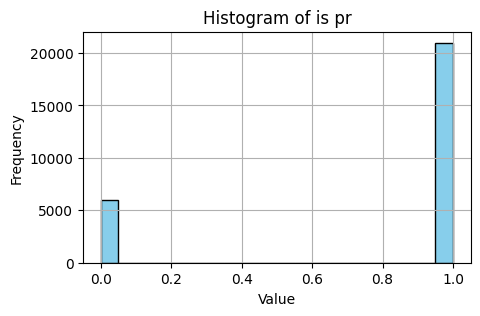

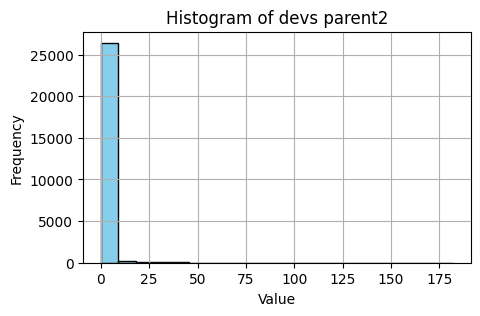

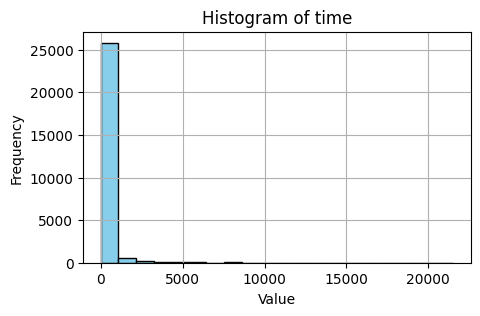

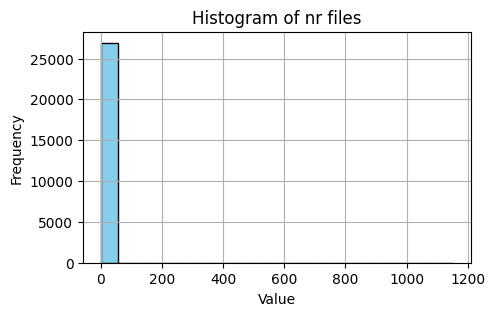

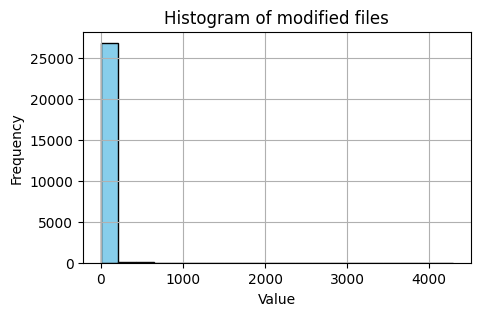

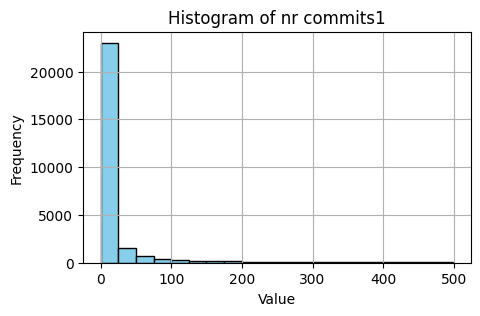

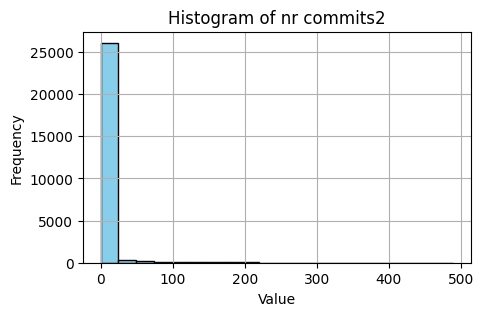

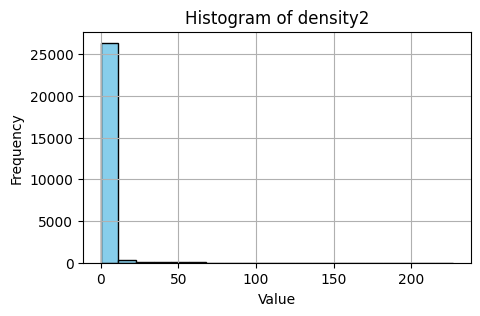

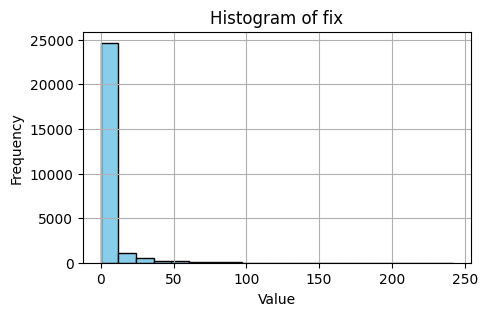

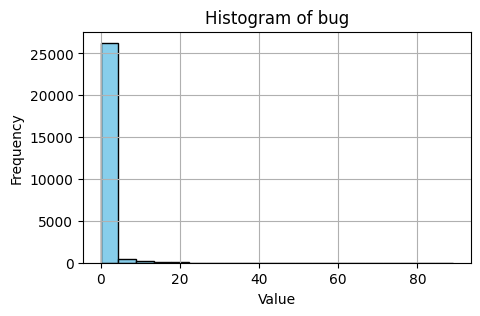

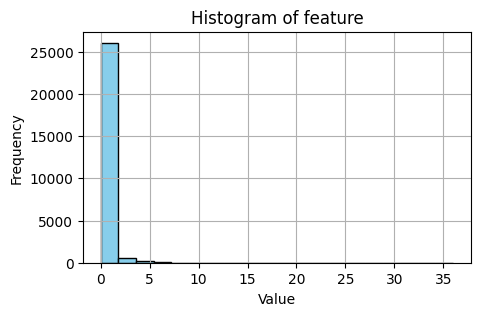

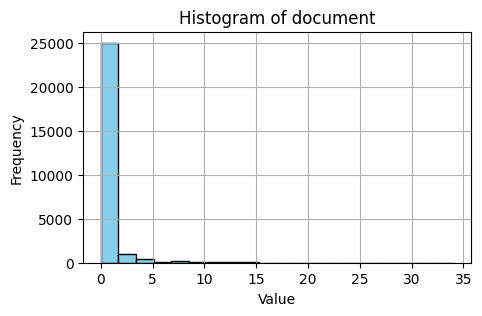

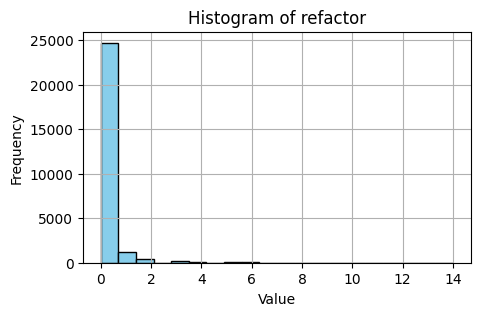

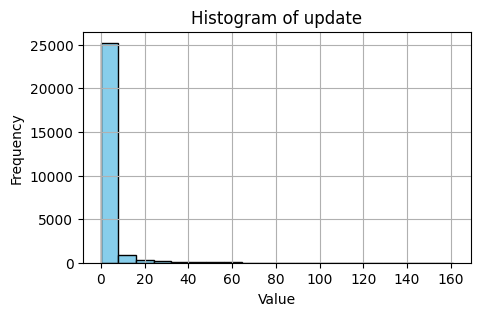

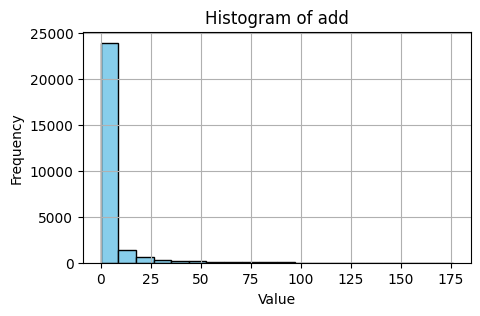

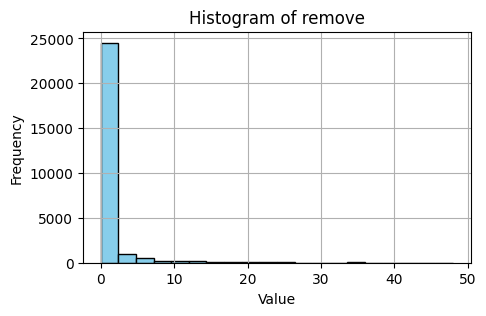

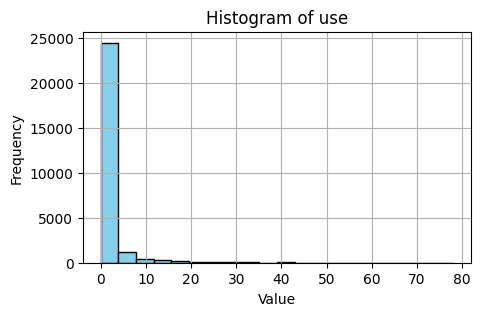

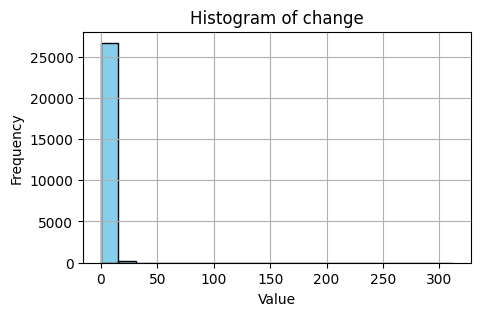

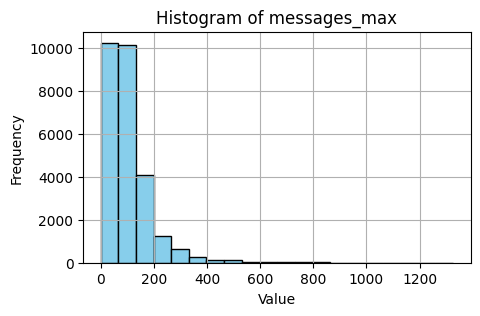

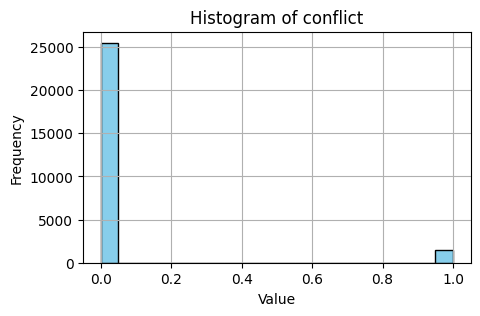

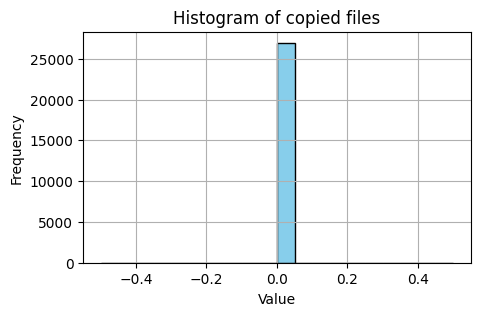

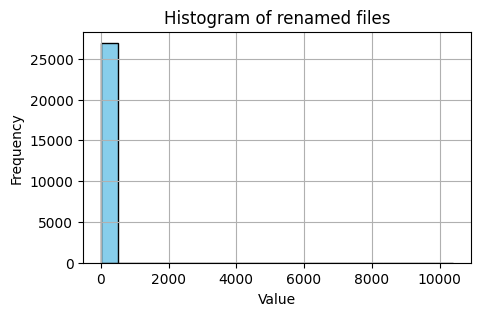

In [23]:
# Iterate through each column in the DataFrame
for column_name in relevant_data.columns:
    # Create a histogram for the current column
    plt.figure(figsize=(5, 3))
    plt.hist(relevant_data[column_name], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

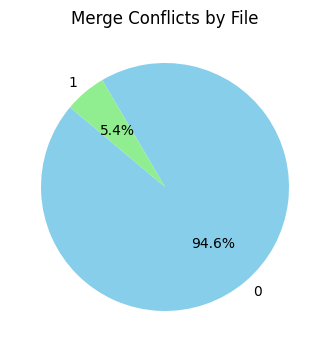

In [24]:
merge_conflicts = dataset['conflict'].value_counts()

plt.figure(figsize=(4, 8))  # Set the figure size
merge_conflicts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.title('Merge Conflicts by File')
plt.ylabel('')  # Remove the y-axis label
plt.show()

In [56]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Precision
from tensorflow.keras.regularizers import l2


In [57]:
# Split the dataset into features (X) and target (y)
X = dataset.drop("conflict", axis=1)
y = dataset["conflict"]

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [58]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

In [59]:
# Build the improved TensorFlow model with regularization using the functional API
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(input_layer)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=[Precision()])

In [60]:
# Train the model with class weights
history = model.fit(X_train, y_train, epochs=110, batch_size=35, validation_split=0.25, class_weight=class_weight_dict)

Epoch 1/110
875/875 [==============================] - 5s 4ms/step - loss: 2.1355 - precision_6: 0.5965 - val_loss: 1.6937 - val_precision_6: 0.8527
Epoch 2/110
875/875 [==============================] - 3s 4ms/step - loss: 1.4375 - precision_6: 0.8071 - val_loss: 1.0887 - val_precision_6: 0.8421
Epoch 3/110
875/875 [==============================] - 3s 3ms/step - loss: 1.0029 - precision_6: 0.8475 - val_loss: 0.7949 - val_precision_6: 0.8460
Epoch 4/110
875/875 [==============================] - 3s 3ms/step - loss: 0.7531 - precision_6: 0.8555 - val_loss: 0.6167 - val_precision_6: 0.8467
Epoch 5/110
875/875 [==============================] - 3s 3ms/step - loss: 0.5993 - precision_6: 0.8592 - val_loss: 0.4997 - val_precision_6: 0.8481
Epoch 6/110
875/875 [==============================] - 3s 4ms/step - loss: 0.4963 - precision_6: 0.8601 - val_loss: 0.4224 - val_precision_6: 0.8498
Epoch 7/110
875/875 [==============================] - 3s 3ms/step - loss: 0.4298 - precision_6: 0.8633 - 

In [61]:
# Evaluate the model
loss, precision = model.evaluate(X_test, y_test)
print(f'Test Precision: {precision}')


319/319 [==============================] - 2s 5ms/step - loss: 0.2062 - precision_6: 0.9145
Test Precision: 0.914548397064209


In [62]:
# Predictions with adjusted threshold
threshold = 0.55  # Adjust this value to improve precision
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > threshold).astype("int32")

319/319 [==============================] - 1s 2ms/step


In [63]:
# Calculate F1-Score and Recall
f1 = f1_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
print(f'F1-Score: {f1}')
print(f'Recall: {recall}')

F1-Score: 0.951035781544256
Recall: 0.9811540703322323


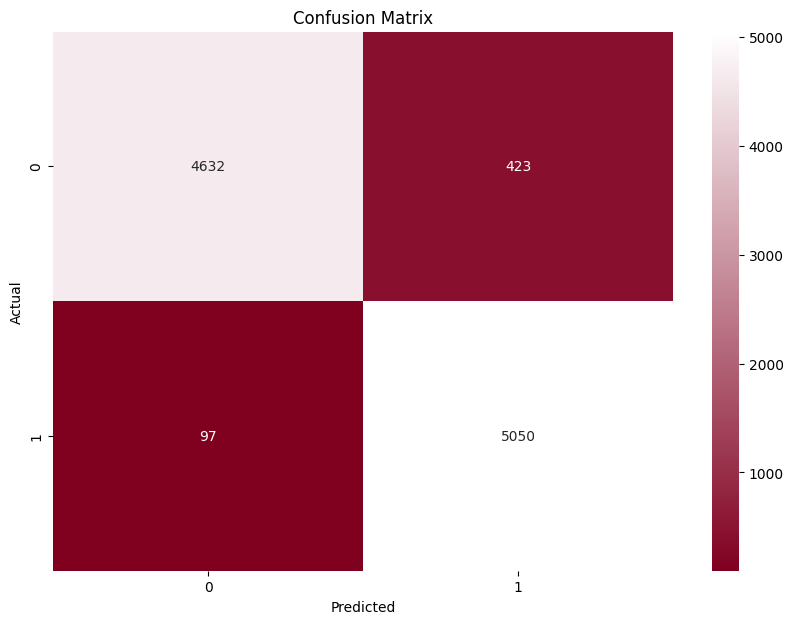

In [64]:
import matplotlib.colors as mcolors
# Calculate and plot the confusion matrix
# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))

# Custom burgundy to white colormap
cmap = mcolors.LinearSegmentedColormap.from_list("BurgundyWhite", ["#800020", "white"])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

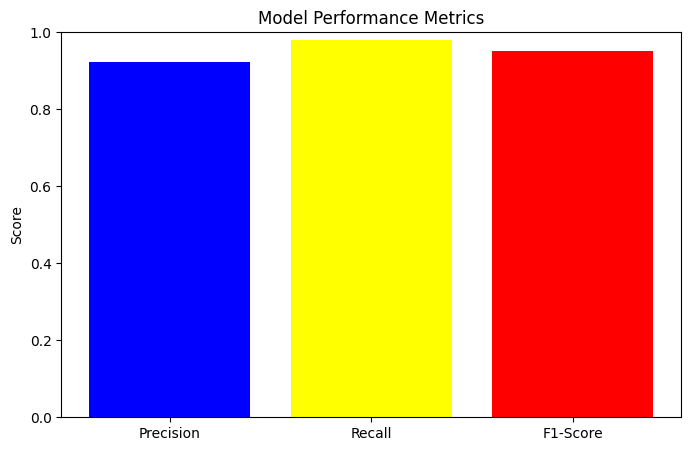

In [65]:
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

# Create a bar plot
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'yellow', 'red'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.show()
